

1.   **NAME-KOUSHIK LAYEK**
2.   **STUDENT ID-SC23M007**



In [ ]:
#import libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")
import time
import tracemalloc





# **ANALYZE DATA_1**

In [ ]:
#entry the given data
df=pd.read_csv('/content/data1.csv',header=None)

#normalised the data
for column in df.columns[0:2]:
  df[column]=(df[column] - df[column].min()) / (df[column].max() - df[column].min())

#slicing the data
X=df.iloc[:,:-1]
Y=(df.iloc[:,-1].values)
Y2=Y.reshape(-1,1)
X2 = np.c_[np.ones((X.shape[0],1)), X]
total_rows=len(X2)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X2[train_indices, :]
Y2_train = Y2[train_indices, :]

# Create the testing set by excluding the training indices
X2_test = np.delete(X2, train_indices, axis=0)
Y2_test = np.delete(Y2, train_indices, axis=0)

In [ ]:
# Defining the cost function

def cost_fnc(W, X2, Y2):

    pred = X2.dot(W) #getting the prediction

    cost = (1/2)*np.sum(np.square(Y2 - pred)) #calculating J(w)

    return cost

In [ ]:
# Defining the gradient descent function

def grad_desc_fnc(X2, Y2, W, alpha):

    n = X2.shape[0] #number of datapoints
    m = X2.shape[1] #number of attributes
    iter = 1000

    cost_iter = np.zeros(iter)
    W_iter = np.zeros((iter, m))

    for i in range(iter):
        pred = X2.dot(W)
        W = W - (alpha/n)*(X2.T.dot((pred - Y2)))
        W_iter[i,:] = W.T
        cost_iter[i] = cost_fnc(W, X2, Y2)

    return W, cost_iter, W_iter, iter

In [ ]:
def lr(x, y, alpha_opt):

  # Setting parameters for Gradient Desecnt
  m = x.shape[1]#gives the number of columns
  W = np.zeros((m,1))

  # Executing  by calling the gradient descent function
  W, cost_iter, W_iter, iter = grad_desc_fnc(x, y, W, alpha_opt)

  return W, cost_iter, W_iter, iter

#chose alpha value using Monte carlo

In [ ]:
#define a range of alpha value
alpha_values=[0.001,0.1,0.0001,0.00001]

mse_value=[]

#num_repetation=3
for i in range(len(alpha_values)):
  mse_total=0
  for j in range(3):
    W,cost_iter,W_iter,iter = lr(X2_train, Y2_train, alpha_values[i])
#predicted value on testing data
    Y2_test_predicted=X2_test.dot(W)
    Y2_test_predicted
# Avg. MSE = Avg(Y - Y_pred)
    mse = np.sum(np.square(Y2_test - Y2_test_predicted))/Y2_test.shape[0]
    mse_total+=mse
  average_mse_for_each_alpha=mse_total/3
  mse_value.append(average_mse_for_each_alpha)
optimal_alpha = alpha_values[np.argmin(mse_value)]
print('optimal_alpha=',optimal_alpha)






optimal_alpha= 0.1


In [ ]:
#calling the function
W, cost_iter, W_iter, iter = lr(X2_train, Y2_train, optimal_alpha)

In [ ]:
W

array([[0.02145246],
       [0.95629055]])

**1(a)plot J(w) against iterations**

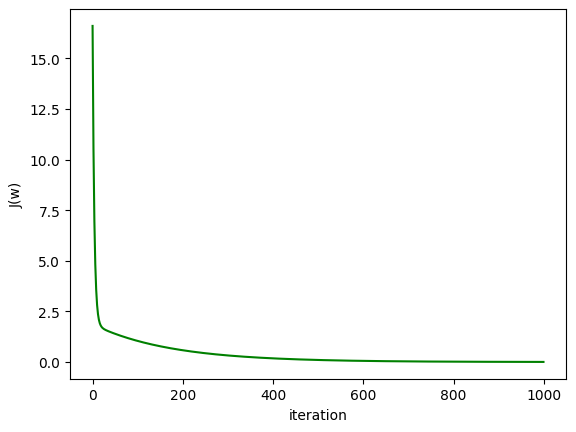

In [ ]:
plt.plot(range(iter),cost_iter,color='green')
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.show()

**1(b)plot J(w) against w obtained in each iteration for data_1**

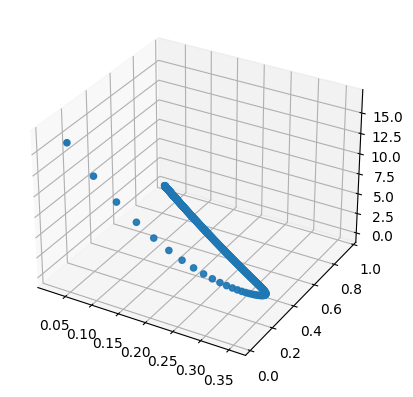

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(W_iter[:,0],W_iter[:,1],cost_iter, cmap='viridis')
plt.show()

**1(c)plot the hyperplane that generates the data_1**

In [ ]:
X2_train

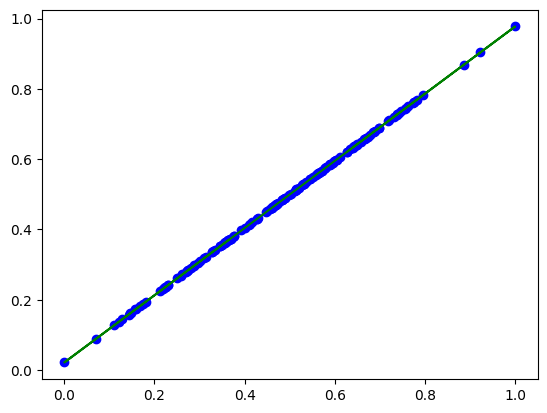

In [ ]:
#calculate the value of y=w_1x+w_0 and put in as list
y=X2_train.dot(W)

#convert x into a array
x=X2_train[:,1]


#plot the graph x vs y
plt.plot(x,y,color='green')
plt.scatter(x, y, color='blue', marker='o', label='Data Points')
plt.show()


**1(d)Describe the experimental procedure used**

In [ ]:
#describe the experimental procedure
experimental_procedure=print('Here I used Batch gradient descent algorithm')




Here I used Batch gradient descent algorithm


**1(e)value of the parameter**

In [ ]:
#value of the parameter
W.reshape(1,2)


array([[0.01660909, 0.9660674 ]])

## **ANALYZE DATA_2**

In [ ]:
#entry the given data
df2=pd.read_csv('/content/data2.csv',header=None)

#normalised the data
for column in df2.columns[0:3]:
  df2[column]=(df2[column] - df2[column].min()) / (df2[column].max() - df2[column].min())

#slicing the data
X=df2.iloc[:,:-1]
Y=(df2.iloc[:,-1].values)
Y2=Y.reshape(-1,1)
X2 = np.c_[np.ones((X.shape[0],1)), X]
total_rows=len(X2)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X2[train_indices, :]
Y2_train = Y2[train_indices, :]

# Create the testing set by excluding the training indices
X2_test = np.delete(X2, train_indices, axis=0)
Y2_test = np.delete(Y2, train_indices, axis=0)


In [ ]:
np.shape(X2_train)

(160, 3)

In [ ]:
# Defining the cost function

def cost_fnc(W, X2, Y2):
    pred = X2.dot(W) #getting the prediction

    cost = (1/2)*np.sum(np.square(Y2 - pred)) #calculating J(w)

    return cost

In [ ]:
# Defining the gradient descent function

def grad_desc_fnc(X2, Y2, W, alpha):

    n = X2.shape[0] #number of observations
    m = X2.shape[1] #number of features/attributes
    iter = 800

    cost_iter = np.zeros(iter)
    W_iter = np.zeros((iter, m))

    for i in range(iter):
        pred = X2.dot(W)
        W = W - (alpha/n)*(X2.T.dot((pred - Y2)))
        W_iter[i,:] = W.T
        cost_iter[i] = cost_fnc(W, X2, Y2)

    return W, cost_iter, W_iter, iter

In [ ]:
def lr(x, y, alpha_opt):

  # Setting parameters for Gradient Desecnt
  m = x.shape[1]
  W = np.zeros((m,1))

  # Executing the Gradient Descent by calling the gradient descent function
  W, cost_iter, W_iter, iter = grad_desc_fnc(x, y, W, alpha_opt)

  return W, cost_iter, W_iter, iter

**chosing alpha using monte carlo**

In [ ]:
#define a range of alpha value
alpha_values=[0.1,0.01,0.0001,0.00001]

mse_value=[]

#num_repetation=3
for i in range(len(alpha_values)):
  mse_total=0
  for j in range(3):
    W,cost_iter,W_iter,iter = lr(X2_train, Y2_train, alpha_values[i])
#predicted value on testing data
    k=X2_test
    p=W
    Y2_test_predicted=k.dot(p)
    Y2_test_predicted

# Avg. MSE = Avg(Y - Y_pred)

    mse = np.sum(np.square(Y2_test - Y2_test_predicted))/Y2_test.shape[0]
    mse_total+=mse
  average_mse_for_each_alpha=mse_total/3
  mse_value.append(average_mse_for_each_alpha)
optimal_alpha = alpha_values[np.argmin(mse_value)]
print('optimal_alpha=',optimal_alpha)


optimal_alpha= 0.1


In [ ]:
#calling the function
W, cost_iter, W_iter, iter = lr(X2_train, Y2_train, optimal_alpha)

# **1(a)Plot J(w) against iteration**

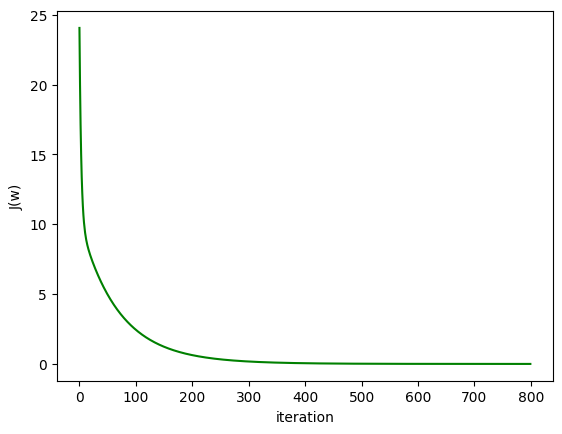

In [ ]:
plt.plot(range(iter),cost_iter,color='green')
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.show()

# **1(c)plot the hyperplane that generates the data**

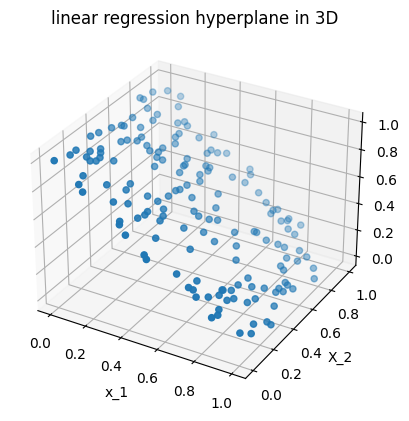

In [ ]:
#calculate the value of y=w_2x_2+w_1x_1+w_0 and put in as list
y=X2_train.dot(W)

#plot the graph x vs y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2_train[:,-2],X2_train[:,-1],y)

#label the axes
ax.set_xlabel('x_1')
ax.set_ylabel('X_2')
ax.set_title('linear regression hyperplane in 3D')
plt.show()


# **1(d)Describe the experimental procedure used**

In [ ]:
print('Here I used Batch Gradient descent method')

Here I used Batch Gradient descent method


# **1(e)Report the parameter of the model**

In [ ]:
parameter=W.reshape(1,3)
parameter

array([[ 0.99438979, -0.99519193,  0.00594936]])

# **ANALYZE DATA_3 USING LINEAR REGRESSION**

In [ ]:
#entry the given data
df3=pd.read_csv('/content/data3.csv',header=None)

#normalised the data
for column in df3.columns[0:51]:
  df3[column]=(df3[column] - df3[column].min()) / (df3[column].max() - df3[column].min())

#slicing the data
X=df3.iloc[:,:-1]
Y=(df3.iloc[:,-1].values)
Y2=Y.reshape(-1,1)
X2 = np.c_[np.ones((X.shape[0],1)), X]
total_rows=len(X2)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X2[train_indices, :]
Y2_train = Y2[train_indices, :]

# Create the testing set by excluding the training indices
X2_test = np.delete(X2, train_indices, axis=0)
Y2_test = np.delete(Y2, train_indices, axis=0)



# **2(a)Find the parameter using direct method and iterative method**

In [ ]:
#Find the parameter using direct method


#direct method
X_T_X=(X2.T.dot(X2))
inverse_part=np.linalg.inv(X_T_X)
X_T_Y=(X2.T.dot(Y2))

#calculate weight(w)
W_direct_method=inverse_part.dot(X_T_Y)
print('W=',W_direct_method.reshape(1,51))






W= [[-2.71733147  0.03615938  0.15786671  0.06013245  0.09173116  0.12722907
   0.21486356  0.15672859  0.17561753  0.03642319  0.15321616  0.25326768
   0.05086404  0.15710114  0.03058537  0.10961965  0.18709581  0.03240867
   0.19861451  0.1737768   0.24328497  0.18695047  0.10928743  0.16044336
   0.1346809   0.02628632  0.16578363  0.24208039  0.11713739  0.19075899
   0.14180716  0.06076273  0.15910835  0.04689662  0.21030626  0.05529417
   0.04796783  0.24471129  0.07041322  0.05643851  0.15541631  0.08228961
   0.08362933  0.23189984  0.08849915  0.04098738  0.05460978  0.09443089
   0.21751512  0.16989217  0.07693597]]


In [ ]:
#Find the parameter using iterative method


# Defining the cost function

def cost_fnc(W, X2, Y2):

    n = X2.shape[0] #number of observations
    pred = X2.dot(W) #getting the prediction

    cost = (1/2)*np.sum(np.square(Y2 - pred)) #calculating J(w)

    return cost

In [ ]:
# Defining the gradient descent function

def grad_desc_fnc(X2, Y2, W, alpha):

    n = X2.shape[0] #number of observations
    m = X2.shape[1] #number of features/attributes
    iter = 2000

    cost_iter = np.zeros(iter)
    W_iter = np.zeros((iter, m))

    for i in range(iter):
        pred = X2.dot(W)
        W = W - (alpha/n)*(X2.T.dot((pred - Y2)))
        W_iter[i,:] = W.T
        cost_iter[i] = cost_fnc(W, X2, Y2)

    return W, cost_iter, W_iter, iter

In [ ]:
def lr(x, y, alpha_opt):

  # Setting parameters for Gradient Desecnt
  m = x.shape[1]
  W = np.zeros((m,1))

  # Executing the Gradient Descent by calling the gradient descent function
  W, cost_iter, W_iter, iter = grad_desc_fnc(x, y, W, alpha_opt)

  return W, cost_iter, W_iter, iter

**Chosing alpha using monte carlo**

In [ ]:
#define a range of alpha value
alpha_values=[0.001,1e-6,0.0001,0.00001]

mse_value=[]

#num_repetation=3
for i in range(len(alpha_values)):
  mse_total=0
  for j in range(30):
    W,cost_iter,W_iter,iter = lr(X2_train, Y2_train, alpha_values[i])
#predicted value on testing data
    k=X2_test
    p=W
    Y2_test_predicted=k.dot(p)
    Y2_test_predicted

# Avg. MSE = Avg(Y - Y_pred)

    mse = np.sum(np.square(Y2_test - Y2_test_predicted))/Y2_test.shape[0]
    mse_total+=mse
  average_mse_for_each_alpha=mse_total/3
  mse_value.append(average_mse_for_each_alpha)
optimal_alpha = alpha_values[np.argmin(mse_value)]
print('optimal_alpha=',optimal_alpha)


optimal_alpha= 0.001


In [ ]:
#calling the function
W, cost_iter, W_iter, iter = lr(X2_train, Y2_train, optimal_alpha)


In [ ]:
W_iter

array([[0.00047273, 0.00024836, 0.00024033, ..., 0.00025008, 0.00022041,
        0.00023895],
       [0.00093904, 0.00049339, 0.00047744, ..., 0.00049684, 0.0004379 ,
        0.00047462],
       [0.00139902, 0.00073512, 0.0007114 , ..., 0.00074033, 0.00065252,
        0.00070706],
       ...,
       [0.02248011, 0.01711382, 0.01950377, ..., 0.02306124, 0.02088735,
        0.00772371],
       [0.02247353, 0.01711307, 0.01950454, ..., 0.02306343, 0.02088955,
        0.0077187 ],
       [0.02246695, 0.01711233, 0.01950531, ..., 0.02306561, 0.02089175,
        0.00771369]])

# **2(b) Compare the time taken and space requirements of two approaches.**

Time taken and space taken  for direct method

In [ ]:
#time and space taken for direct method

#starting the monitaring
tracemalloc.start()


#for counting time
start_time=time.time()

X_T_X=(X2.T.dot(X2))
inverse_part=np.linalg.inv(X_T_X)
X_T_Y=(X2.T.dot(Y2))

#calculate weight(w)
W_direct_method=inverse_part.dot(X_T_Y)

#ending time
end_time=time.time()

#time diff calculating
time_d=end_time-start_time

print("space taken=",tracemalloc.get_traced_memory())

#stop monitaring
tracemalloc.stop()


print('time taken in the direct_method=',time_d)

space taken= (64807, 102037)
time taken in the direct_method= 0.011493206024169922


Time and Space taken for iterative method

In [ ]:
#time taken for iterative method
start_time=time.time()
W, cost_iter, W_iter, iter = lr(X2_train, Y2_train, optimal_alpha)

end_time=time.time()

time_difference=end_time-start_time
print('time taken in iterative_method=',time_difference)


time taken in iterative_method= 0.05368232727050781


space taken by iterative method

In [ ]:
#starting the monitoring
tracemalloc.start()

#my function
W, cost_iter, W_iter, iter = lr(X2_train, Y2_train, optimal_alpha)


#display the memory
print("space taken=",tracemalloc.get_traced_memory())

#stop the monitaring
tracemalloc.stop()




space taken= (834701, 845157)


# **2(d)Report the values of the hyperparameters and parameters of the model**

In [ ]:
np.shape(W)

(51, 1)

In [ ]:
#values of the parameters
parameters_value=W.reshape(1,51)
print('parameters_value for data3 are=',parameters_value)


#values of the hyperparameters
print('hyperparameter_value for data3 is =',optimal_alpha)


parameters_value for data3 are= [[-0.91857261  0.04590331  0.10888249 -0.01681123  0.09415452  0.06058478
   0.23530478 -0.01818338  0.12741754 -0.04106954  0.08141161  0.08449418
  -0.05025557  0.06571948 -0.09493154  0.11685326  0.11599997  0.06654766
   0.10328757  0.05260406  0.31399368  0.10893228  0.16544851  0.01160129
  -0.05422791 -0.11928069  0.09805588  0.20112098  0.02673835  0.13147563
   0.05484149 -0.0661266   0.04804166 -0.07693514  0.13762721  0.09686691
   0.03249649  0.01374524  0.02716535 -0.09654295  0.08941119 -0.00842612
   0.06831655  0.19957991  0.07837215 -0.05224822  0.00568853 -0.02402658
   0.16224627  0.19452956 -0.10914537]]
hyperparameter_value for data3 is = 0.1


### **2(e)Analyze the performance of the model**

For iterative method

In [ ]:
#predicted value on testing data
min(mse_value)

0.3718700255909823

For direct method

In [ ]:
# Getting prediction on the test data

Y2_test_pred = X2_test.dot(W_direct_method)


# Avg. MSE = Avg(Y - Y_pred)

mse = np.sum(np.square(Y2_test - Y2_test_pred))/Y2_test.shape[0]

print("MSE via direct method is ", mse)

MSE via direct method is  1.4672716037785504e-11
